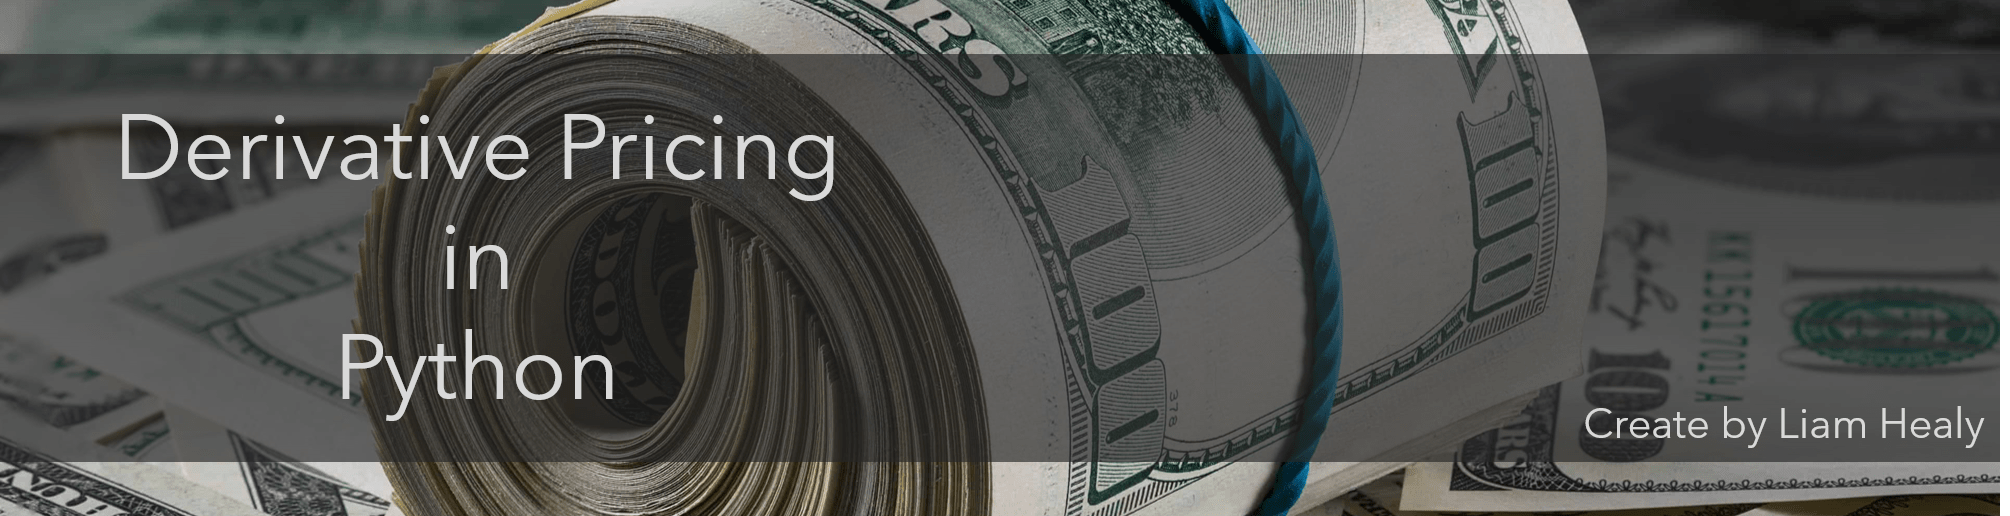

<a href="https://linkedin.com/in/ljhealy1992">Liam Healy</a> $\cdot$ Mar 18, 2019 $\cdot$ 30 min read

---

> ### TL;DL 
> Introduction to pricing vanilla option in Python using the Black-Sholes Framework.

# Introduction

The purpose of this notebook is to provide an introduction to the Black-Sholes Pricing Framework and provide some example using python. We also assess the sensitivity of the price to changes in volatility. The types of options that will be covered in this notebook will only include 'vanilla' options (American and European options).

## Black-Scholes Pricing Framework

The price of a European call $C(S,t)$ is given below, where the $S$ is the underlying asses, $K$ is the strike price, $r$ is the risk-free rate, $T$ is the time to maturity and $\sigma$ is the (constant) volatility of the underlying $S$. Via the Black-Scholes framework, the price of a European Call is:

\begin{equation}
C(S,t) = SN(d_1)-Ke^{-rT}N(d_2)
\end{equation}

with $d_1$ and $d_2$ defined as:

\begin{align*}
d_1 &= \frac{log(S/K)+(r+\frac{\sigma^2}{2})T}{\sigma \sqrt{T}} \\
d_2 &= d_1 - \sigma \sqrt{T}
\end{align*}

Let us now introduce the ****put-call parity*** relationship which states that the relationship between the price of the European call option and European put option, both with the identical strike price $K$ and expiry $T$, has the same value as a single forward contract on this strike price and expiry. 

Mathematically this can be represented as

\begin{equation}
C(S,t) - P(S,t) = S(t) - K \cdot B(t,T)
\end{equation}

where $B(t,T)$ is the present value of a zero-coupon bond that matures to \$1 AT TIME $T$ (present valuye factor for $K$.

Therefore we can write the value of a European Put $P(S,t)$ as:

\begin{equation}
P(S,t) = Ke^{-rT}-S+C(S,t) = Ke^{-rT}-S+(SN(d_1)-Ke^{-rT}N(d_2))
\end{equation}

Two other functions which need to be defined are the cumulative distributuon function and the probability density function of the standard normal distribution. These will not be taken for granted for the purpose of this article as:

[cumulative distribution function for the standard normal distribution](http://en.wikipedia.org/wiki/Normal_distribution#Cumulative_distribution_function):

\begin{equation}
N(x) = \frac{1}{\sqrt{2\pi}}\int_{-\infty}^{x}e^{-t^2/2}dt
\end{equation}

[probability density function of the standard normal distribution](http://en.wikipedia.org/wiki/Normal_distribution#Probability_density_function):

\begin{equation}
f(x) = \frac{1}{\sqrt{2\pi}}e^{-x^2/2}
\end{equation}





## Closed form European Call and Put Prices

Begin by importing the required packages into the Python environment.

In [1]:
from math import exp, log, pi

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

We need to first define the normal probability density function. Given some random input variable $x$ we wish to calculate the probability of obtaining that random variable given a normal distribution. The PDF for a normal distribution is defined as:

\begin{equation}
f(x) = \frac{1}{\sqrt{2\pi}}e^{-x^2/2}
\end{equation}

In [2]:
def norm_pdf(x):
    return (1.0/((2*pi)**0.5))*exp(-0.5*x*x)

To test that function we can plot the probabilities over some fixed range, say $x\in (-5,5)$.

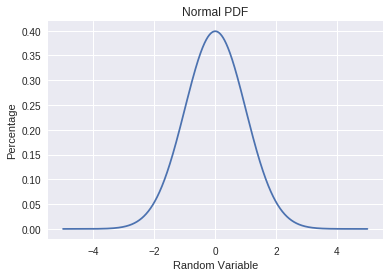

In [3]:
norm_pdf_dist = []
loop = []
for i in range(0,10000):
    j = i/1000 - 5
    loop.append(j)
    norm_pdf_dist.append(norm_pdf(j))
    
plt.subplots(figsize=(6,4))
ax = sns.lineplot(x=loop, y=norm_pdf_dist)
ax.set(xlabel="Random Variable", ylabel="Percentage", title="Normal PDF")
plt.show()

An approximation for the normal cumulative distribution is given by:

\begin{equation}
N(x) = \frac{1}{sqrt(2\pi)} \int^x_{-\infty} e^{-\frac{1}{2}s^2} ds
\end{equation}

In [4]:
def norm_cdf(x):
    k = 1.0/(1.0+0.2316419*x)
    k_sum = k * (0.319381530 + k * (-0.356563782 + \
        k * (1.781477937 + k * (-1.821255978 + 1.330274429 * k))))

    if x >= 0.0:
        return (1.0 - (1.0 / ((2 * pi)**0.5)) * exp(-0.5 * x * x) * k_sum)
    else:
        return 1.0 - norm_cdf(-x)

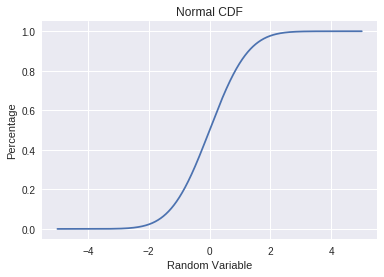

In [5]:
norm_cdf_dist = []
loop_cdf = []
for i in range(0,10000):
    j = i/1000 - 5
    loop_cdf.append(j)
    norm_cdf_dist.append(norm_cdf(j))
    
plt.subplots(figsize=(6,4))
ax = sns.lineplot(x=loop, y=norm_cdf_dist)
ax.set(xlabel="Random Variable", ylabel="Percentage", title="Normal CDF")
plt.show()

Now we just need to calculate the $d_1$ and $d_2$ to complete the Black-Scholes framework. To simplify the implementation of this model we can write $d_j, j\in {1,2}$ as the single function:

\begin{equation}
d_j = \frac{log(\frac{S}{K})+(r+(-1)^{j-1} \frac{1}{2}\sigma^2)T}{ \sigma \sqrt{T}}
\end{equation}

In [6]:
def d_j(j, S, K, r, v, T):
    return (log(S/K) + (r + ((-1)**(j-1))*0.5*v*v)*T)/(v*(T**0.5))

The price of a Europian Vanilla Call option $C(S,t)$ and Put $P(S,t)$ is defined in the functions below:

In [7]:
def vanilla_call_price(S, K, r, v, T):
    return S * norm_cdf(d_j(1, S, K, r, v, T)) - \
        K*exp(-r*T) * norm_cdf(d_j(2, S, K, r, v, T))

def vanilla_put_price(S, K, r, v, T):
    return -S * norm_cdf(-d_j(1, S, K, r, v, T)) + \
        K*exp(-r*T) * norm_cdf(-d_j(2, S, K, r, v, T))

### Call-Put Price Interpretation

Consider we are interested in pricing a European call in a simplified market where the rate $r$ and volatility $\sigma$  is approximately zero. 

**Example 1 - Strike Price equal to Underlying Value $(S=K)$**
The price of the option is $\sim 0$ since the option could be instantly excersised for for the same value.

In [8]:
VCP = vanilla_call_price(100, 100, 0.0000001, 0.0000001, 10)
VPP = vanilla_put_price(100, 100, 0.0000001, 0.0000001, 10)

print('Call Price: {}'.format(VCP))
print('Put Price: {}'.format(VPP))

Call Price: 0.00010000667828080623
Put Price: 6.728288662327664e-09


**Example 2 - Strike Price less than Underlying Value $(S<K)$**

Consider the same example but instead of the strike price being equal to the underlying $(S=K)$, let us assume the strike price is 50% higher than the underlying value $(S=K \cdot 2)$. In this example the Call option would be worth the difference betweent the Underlying value and the Strike price because the option would instantly be in-the-money and could be excersised for a profit.

In [9]:
VCP = vanilla_call_price(100, 50, 0.0000001, 0.0000001, 10)
VPP = vanilla_put_price(100, 50, 0.0000001, 0.0000001, 10)

print('Call Price: {}'.format(VCP))
print('Put Price: {}'.format(VPP))

Call Price: 50.000049999975
Put Price: 0.0


Below we provide examples of the Payoff functions for the Europian Call and Put option when the Strike Price is fixed at $(K=50)$ and the underlying value is variable.

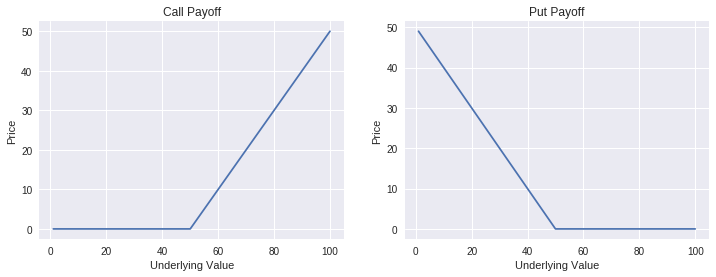

In [10]:
call_payoff = []
put_payoff = []
loop = []
for i in range(1,101):
    loop.append(i)
    call_payoff.append(vanilla_call_price(i, 50, 0.0000001, 0.0000001, 10))
    put_payoff.append(vanilla_put_price(i, 50, 0.0000001, 0.0000001, 10))
    
fig, ax = plt.subplots(1,2, figsize=(12,4))
sns.lineplot(x=loop, y=call_payoff, ax=ax[0])
sns.lineplot(x=loop, y=put_payoff, ax=ax[1])
ax[0].set(title="Call Payoff", xlabel="Underlying Value", ylabel="Price")
ax[1].set(title="Put Payoff", xlabel="Underlying Value", ylabel="Price")
plt.show()

In real life conditions, not only does the underlying value of the asset changes but the market can also become more volatile and interests rates may change through time. All these factors introduce more unknowns when we are interesting in calculating the price of an option. 

Below we demonstrate that the payoff curve changes significantly when the asset volatility is changed.

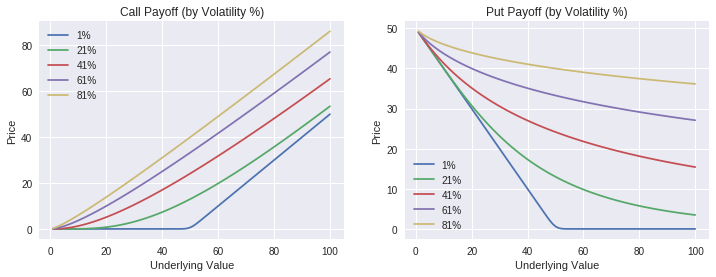

In [11]:
df_call = pd.DataFrame([])
df_put = pd.DataFrame([])
loop = range(1,101)
for v in range(1,101,20):
    sigma = v/100
    df_call_t = pd.DataFrame({'{}%'.format(v): []})
    df_put_t = pd.DataFrame({'{}%'.format(v): []})
    
    for i in range(1,101):
        df_call_t = df_call_t.append({'{}%'.format(v): 
                                      vanilla_call_price(i, 50, 0.0000001, sigma, 10)},
                                     ignore_index=True)
        df_put_t = df_put_t.append({'{}%'.format(v): 
                                    vanilla_put_price(i, 50, 0.0000001, sigma, 10)},
                                   ignore_index=True)
        
    df_call = pd.concat([df_call, df_call_t], axis=1, sort=False)
    df_put = pd.concat([df_put, df_put_t], axis=1, sort=False)

fig, ax = plt.subplots(1,2,figsize=(12,4))
for i in range(5):
    sns.lineplot(x=loop, y=df_call.iloc[:,i], label=df_call.columns.values[i], ax=ax[0])
    sns.lineplot(x=loop, y=df_put.iloc[:,i], label=df_put.columns.values[i], ax=ax[1])
    ax[0].set(title="Call Payoff (by Volatility %)", xlabel="Underlying Value", ylabel="Price")
    ax[1].set(title="Put Payoff (by Volatility %)", xlabel="Underlying Value", ylabel="Price")
    ax[0].legend()
    ax[1].legend()
plt.show()